<a href="https://colab.research.google.com/github/kothaprathyusha55/stroke-patient-healthcare/blob/main/milestone4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

In [4]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [5]:

data.fillna(np.mean(data.bmi),inplace=True)

In [6]:
null_percentage = data.isnull().mean() * 100
null_percentage

,0
id,0.0
gender,0.0
age,0.0
hypertension,0.0
heart_disease,0.0
ever_married,0.0
work_type,0.0
Residence_type,0.0
avg_glucose_level,0.0
bmi,0.0


#Graphical Analysis

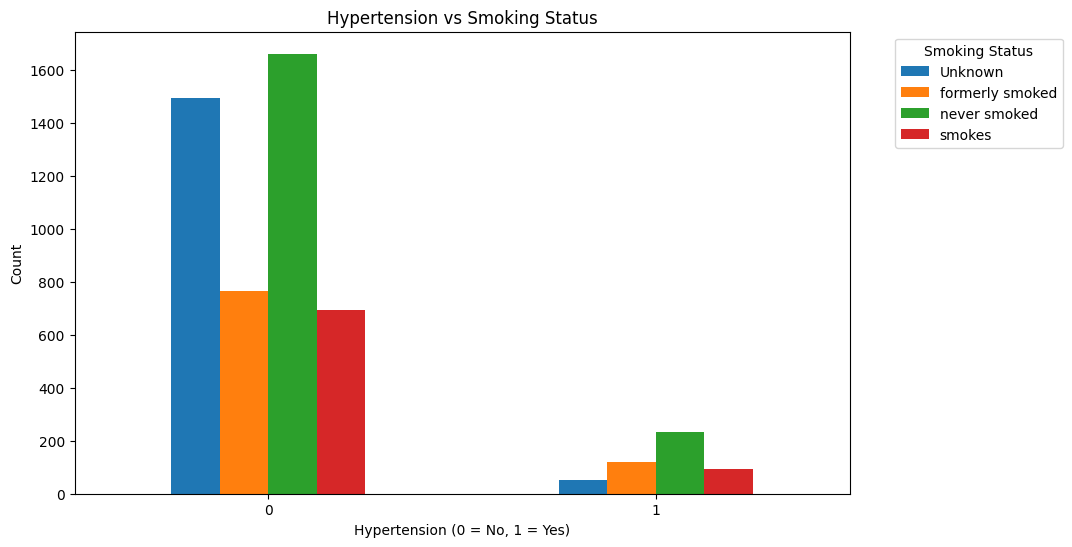

In [7]:
hsc = data.groupby(['hypertension', 'smoking_status']).size().unstack()
hsc.plot(kind='bar', figsize=(10, 6))
plt.title('Hypertension vs Smoking Status')
plt.xlabel('Hypertension (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Smoking Status', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()




*   hypertension and smoking_status, counts the occurrences, and creates a bar plot to visualize the relationship between hypertension and smoking status. The plot is customized with titles, labels, and a legend, and then displayed.

no of people effected with stroke
gender
Female    141
Male      108
dtype: int64


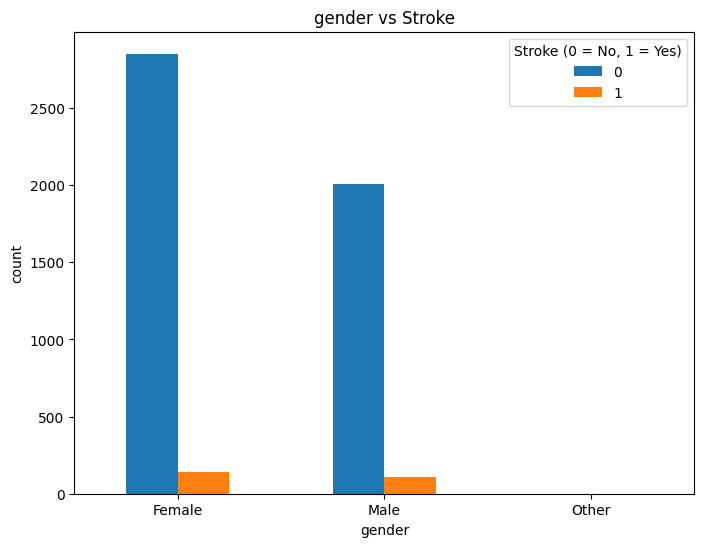

In [8]:
hs = data.groupby(['gender', 'stroke']).size().unstack()
hs.plot(kind='bar', figsize=(8, 6))
plt.title('gender vs Stroke')
plt.xlabel('gender')
plt.ylabel('count')
plt.xticks(rotation=0)
plt.legend(title='Stroke (0 = No, 1 = Yes)')
stroke_counts = data[data['stroke'] == 1].groupby('gender').size()
print('no of people effected with stroke')
print(stroke_counts)
plt.show()



*   By comparing the heights of the bars, you can observe if there is a significant difference in stroke incidence between genders.
*   This can provide insights into whether one gender is more prone to strokes than the other.



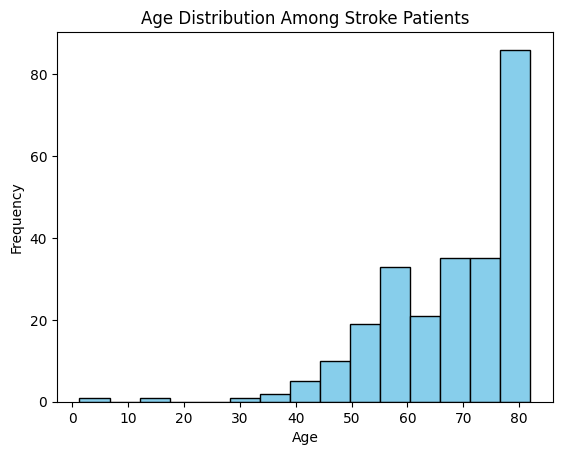

In [9]:
data[data['stroke'] == 1]['age'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title('Age Distribution Among Stroke Patients')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



*   The histogram will show the frequency of stroke cases across different age groups.
*   This visualization helps in understanding the age distribution and identifying any patterns or trends in stroke incidence among different age groups.


*   As we observe from above 70 years old are suffering more with stroke






Average age with hypertension: 62.24497991967871
Average age without hypertension: 41.17302688638335


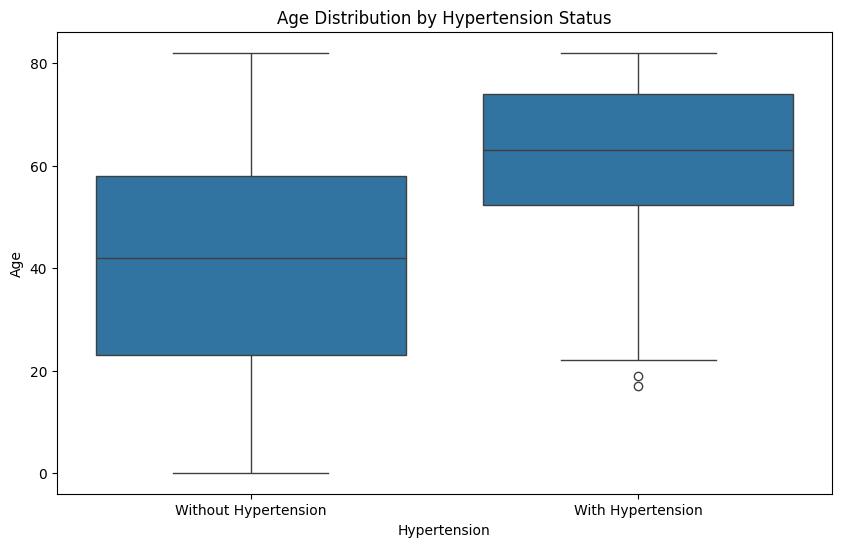

In [10]:
avg_age_with_hypertension = data[data['hypertension'] == 1]['age'].mean()
avg_age_without_hypertension = data[data['hypertension'] == 0]['age'].mean()
print(f"Average age with hypertension: {avg_age_with_hypertension}")
print(f"Average age without hypertension: {avg_age_without_hypertension}")
plt.figure(figsize=(10, 6))
sns.boxplot(x='hypertension', y='age', data=data)
plt.title('Age Distribution by Hypertension Status')
plt.xlabel('Hypertension')
plt.ylabel('Age')
plt.xticks([0, 1], ['Without Hypertension', 'With Hypertension'])
plt.show()



#BOXPLOT

*   The age distribution by hypertension status using a boxplot.
*   The boxplot allows for a visual comparison of age distributions, showing the spread and central tendency of ages within each group.
*   The boxplot allows for a visual comparison of age distributions, showing the spread and central tendency of ages within each group.
*   the boxplot might reveal whether individuals with hypertension tend to be older or younger compared to those without hypertension, and whether there is a significant difference in age distribution between the two groups.







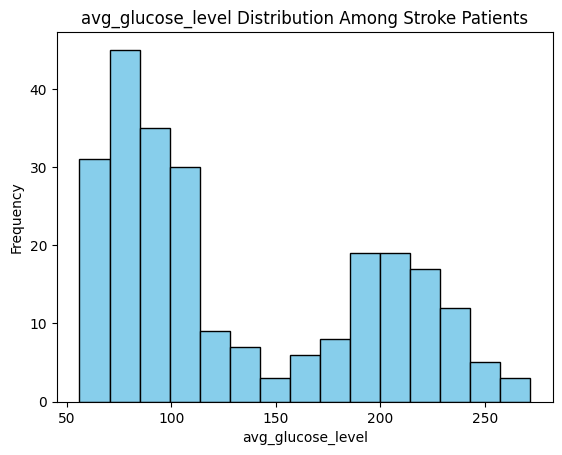

In [11]:
data[data['stroke'] == 1]['avg_glucose_level'].plot(kind='hist', bins=15, color='skyblue', edgecolor='black')
plt.title('avg_glucose_level Distribution Among Stroke Patients')
plt.xlabel('avg_glucose_level')
plt.ylabel('Frequency')
plt.show()



*   This histogram allows for a comparative analysis of glucose levels among stroke patients. By examining the distribution,we can identify common glucose levels and observe any patterns or trends.
*   Comparing this distribution to the overall population or non-stroke patients can reveal if stroke patients tend to have higher or lower glucose levels.



# **pairplot**

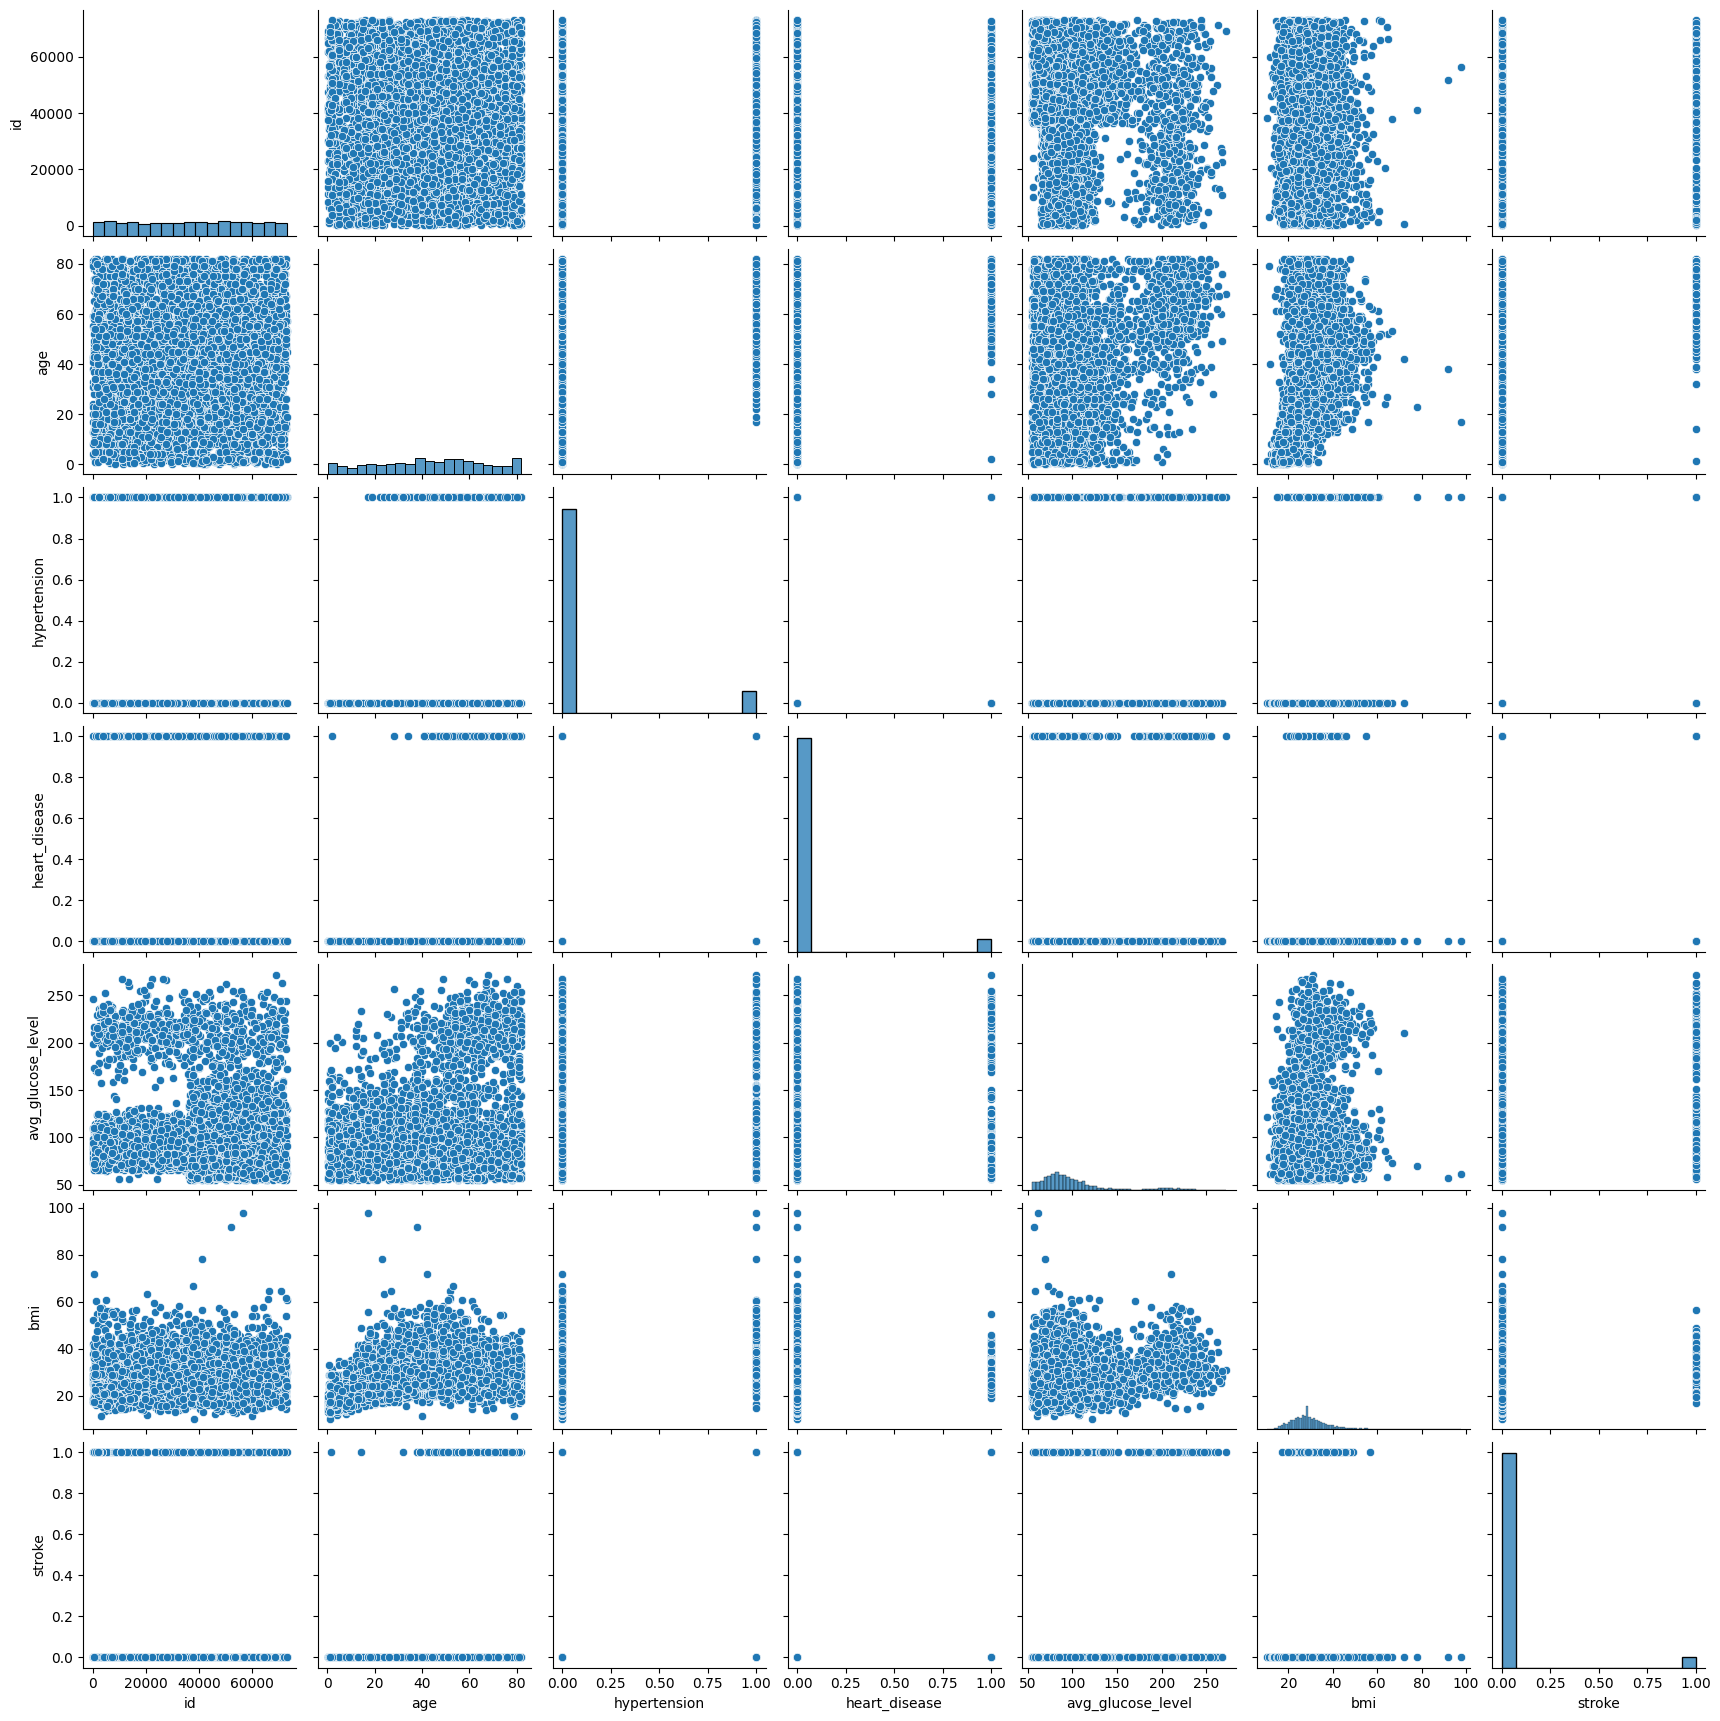

In [12]:
sns.pairplot(data)
plt.show()

In [13]:
data['Urban/Rural'] = data['Residence_type'].apply(lambda x: 1 if x == 'Urban' else 0)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0




*   A lambda function is applied to each value in the Residence_type column, assigning a value of 1 if the residence type is ‘Urban’ and 0 if it is ‘Rural’.
*   The transformation simplifies the analysis by converting categorical data into numerical data, which is often required for machine learning algorithms and statistical analysis.



In [14]:
data['Never_worked'] = data['work_type'].apply(lambda x: 1 if x == 'Never_worked' else 0)
data['Private'] = data['work_type'].apply(lambda x: 1 if x == 'Private' else 0)
data['Self_employed'] = data['work_type'].apply(lambda x: 1 if x == 'Self-employed' else 0)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,Never_worked,Private,Self_employed
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,0,1,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,0,0,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,0,1,0
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,0,0,1




*   the lambda function checks the value of work_type and assigns a value of 1 if it matches the specified work type, otherwise 0.


*   Three columns will be created Never_worked,Private,Self_employed with encoding .1 if the work_type is ‘Self-employed’, otherwise 0, 1 if the work_type is ‘Private’, otherwise 0,1 if the work_type is ‘Never_worked’, otherwise 0.






In [15]:
data['formerly_smoked'] = data['smoking_status'].apply(lambda x: 1 if x == 'formerly smoked' else 0)
data['never_smoked'] = data['smoking_status'].apply(lambda x: 1 if x == 'never smoked' else 0)
data['smokes'] = data['smoking_status'].apply(lambda x: 1 if x == 'smokes' else 0)
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Urban/Rural,Never_worked,Private,Self_employed,formerly_smoked,never_smoked,smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,1,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1,0,0,0,1,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,0,0,1,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1,1,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1,0,0,0,1,0,1,0




*   the lambda function checks the value of smoking_status and assigns a value of 1 if it matches the specified smoking status, otherwise 0.
*   Three columns will be created ,1 if the smoking_status is ‘formerly smoked’, otherwise 0,1 if the smoking_status is ‘never smoked’, otherwise 0,1 if the smoking_status is ‘smokes’, otherwise 0.




In [37]:
data_model.drop(['Residence_type', 'work_type', 'smoking_status', 'gender', 'ever_married'], axis=1, inplace=True)



*   The drop method from the pandas library to remove specific columns from a DataFrame named data_model. By specifying the columns 'Residence_type', 'work_type', 'smoking_status', 'gender', and 'ever_married' in a list, and setting the axis parameter to 1, the code indicates that these columns should be dropped. The inplace=True argument ensures that the changes are made directly to the original DataFrame without needing to create a new one.



In [38]:
data_model.head(10)

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,Never_worked,Private,Self_employed,formerly_smoked,never_smoked,smokes,Male,Female,Other
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,1,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,0,1,0,0,1,0,1,0,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,1,0,0,0,1,0,1,0
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,1,0,1,0,0,1,0
5,56669,81.0,0,0,186.21,29.000000,1,1,0,1,0,1,0,0,1,0,0
6,53882,74.0,1,1,70.09,27.400000,1,0,0,1,0,0,1,0,1,0,0
7,10434,69.0,0,0,94.39,22.800000,1,1,0,1,0,0,1,0,0,1,0
8,27419,59.0,0,0,76.15,28.893237,1,0,0,1,0,0,0,0,0,1,0
9,60491,78.0,0,0,58.57,24.200000,1,1,0,1,0,0,0,0,0,1,0


In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import datetime as dt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [39]:
X = data_model.drop('stroke', axis=1) # independent var
y = data_model['stroke'] # Dependent var

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=61)
X_train

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,Urban/Rural,Never_worked,Private,Self_employed,formerly_smoked,never_smoked,smokes,Male,Female,Other
141,45965,59.0,0,0,116.44,23.8,0,0,1,0,0,0,1,0,1,0
928,41097,23.0,1,0,70.03,78.0,1,0,1,0,0,0,1,0,1,0
2748,21517,54.0,0,0,92.34,29.4,1,0,1,0,0,0,1,1,0,0
2048,39139,57.0,0,0,84.18,35.5,0,0,1,0,0,1,0,0,1,0
185,41081,63.0,0,0,137.30,31.7,0,0,1,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2171,72514,18.0,0,0,120.58,21.5,0,0,1,0,0,1,0,1,0,0
2064,30692,73.0,0,0,82.13,28.5,0,0,1,0,0,1,0,1,0,0
4002,35039,28.0,0,0,99.07,17.6,0,0,1,0,0,1,0,0,1,0
3602,1116,49.0,0,0,104.08,26.6,0,0,0,0,0,1,0,0,1,0




*   The provided code snippet is designed to prepare data for a machine learning model by splitting it into training and testing sets. Initially, it separates the independent variables (features) from the dependent variable (target) by dropping the 'stroke' column from the DataFrame and assigning the remaining columns to X, while the 'stroke' column itself is assigned to y.


*  The train_test_split function from the sklearn.model_selection module is then used to divide the data into training and testing sets, with 20% of the data reserved for testing (test_size=0.2).




In [40]:
data_model.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Urban/Rural,Never_worked,Private,Self_employed,formerly_smoked,never_smoked,smokes,Male,Female,Other
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,0,1,0,1,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,0,0,1,0,0,1,0,1,0,0
3,60182,49.0,0,0,171.23,34.400000,1,1,0,1,0,0,0,1,0,1,0
4,1665,79.0,1,0,174.12,24.000000,1,0,0,0,1,0,1,0,0,1,0


In [41]:
data_model=data

**Basic Machine Learning Models**







*   Linear Regression
*  Lasso Regression
*   Ridge Regression
*   Logistic Regression








In [44]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
linear_reg_predictions = linear_reg.predict(X_test)
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
linear_reg_rmse*100

22.451682371255906

1. Initialize the model: linear_reg = LinearRegression()
2. Train the model: linear_reg.fit(X_train, y_train) uses the training data to fit the linear regression model.
3. Make predictions: linear_reg_predictions = linear_reg.predict(X_test) generates predictions for the test data.
4. Evaluate the model: linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions)) calculates the root mean squared error (RMSE) to measure the model's accuracy.
5. Scale the RMSE: linear_reg_rmse*100 scales the RMSE by 100 for easier interpretation.



In [45]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
lasso_reg_predictions = lasso_reg.predict(X_test)
lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))
lasso_reg_rmse*100

23.160736724912255



1. **Initialize the model**: `lasso_reg = Lasso()` creates an instance of the Lasso regression model.
2. **Train the model**: `lasso_reg.fit(X_train, y_train)` fits the Lasso model to the training data.
3. **Make predictions**: `lasso_reg_predictions = lasso_reg.predict(X_test)` generates predictions for the test data.
4. **Evaluate the model**: `lasso_reg_rmse = np.sqrt(mean_squared_error(y_test, lasso_reg_predictions))` calculates the root mean squared error (RMSE) to assess the model's accuracy.
5. **Scale the RMSE**: `lasso_reg_rmse*100` scales the RMSE by 100 for easier interpretation.

In [46]:
Rigid_reg = Ridge()
Rigid_reg.fit(X_train, y_train)
Rigid_reg_predictions = Rigid_reg.predict(X_test)
Rigid_reg_rmse = np.sqrt(mean_squared_error(y_test, Rigid_reg_predictions))
Rigid_reg_rmse*100

22.45148113624418



1. **Initialize the model**: `Rigid_reg = Ridge()` creates an instance of the Ridge regression model.
2. **Train the model**: `Rigid_reg.fit(X_train, y_train)` fits the Ridge model to the training data.
3. **Make predictions**: `Rigid_reg_predictions = Rigid_reg.predict(X_test)` generates predictions for the test data.
4. **Evaluate the model**: `Rigid_reg_rmse = np.sqrt(mean_squared_error(y_test, Rigid_reg_predictions))` calculates the root mean squared error (RMSE) to assess the model's accuracy.
5. **Scale the RMSE**: `Rigid_reg_rmse*100` scales the RMSE by 100 for easier interpretation.


In [48]:
clf=LogisticRegression()
clf.fit(X_train, y_train)
Logistic_pred = clf.predict(X_test)
Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))
Log_reg_rmse*100

24.229819411790597


1. **Initialize the model**: `clf = LogisticRegression()` creates an instance of the Logistic Regression model.
2. **Train the model**: `clf.fit(X_train, y_train)` fits the Logistic Regression model to the training data.
3. **Make predictions**: `Logistic_pred = clf.predict(X_test)` generates predictions for the test data.
4. **Evaluate the model**: `Log_reg_rmse = np.sqrt(mean_squared_error(y_test, Logistic_pred))` calculates the root mean squared error (RMSE) to assess the model's accuracy.
5. **Scale the RMSE**: `Log_reg_rmse*100` scales the RMSE by 100 for easier interpretation.



# **Accuracy score**

In [49]:
clf.score(X_test, y_test)*100

94.12915851272015



*    An accuracy of 94% means your Logistic Regression model is performing very well, correctly predicting 94% of the test instances. This high accuracy indicates that your model has learned the patterns in the data effectively.





In [50]:
Rigid_reg.score(X_test, y_test)*100

7.335478670302898



*    Ridge regression model has an accuracy of 7.33% on the test data. This is quite low, indicating that the model is not performing well in predicting the target variable.




In [51]:
lasso_reg.score(X_test, y_test)*100

1.388348431613784



*    Lasso regression model has an accuracy of 1.8% on the test data, which is very low. This means the model is not performing well in predicting the target variable. The statement lasso_reg.score(X_test, y_test) * 100 calculates the R² score (coefficient of determination) and scales it to a percentage. An R² score of 1.8% indicates that the model explains only 1.8% of the variance in the target variable, suggesting poor performance.




In [52]:
linear_reg.score(X_test, y_test)*100

7.33381753895107



*   The statement linear_reg.score(X_test, y_test) * 100 calculates the R² score (coefficient of determination) and scales it to a percentage. An R² score of 7.3% indicates that the model explains only 7.3% of the variance in the target variable, suggesting poor performance.




# Confusion Matrix

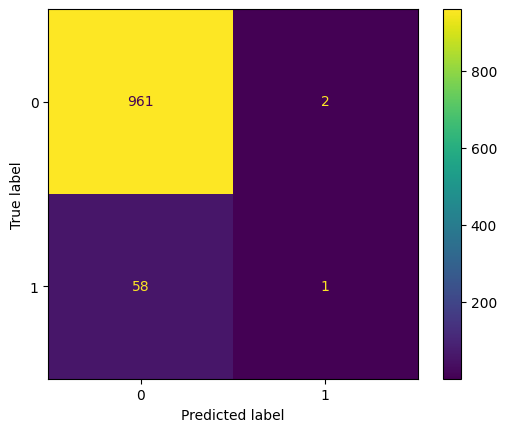

In [53]:
from sklearn import metrics

Confusion_matrix = metrics.confusion_matrix(y_test, Logistic_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = Confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()



*   The ConfusionMatrixDisplay class is used to create a visual representation of the confusion matrix. The display_labels parameter is set to [0, 1], indicating the labels for the binary classification (e.g., 0 for no stroke, 1 for stroke). The plot method is called on the cm_display object to generate the plot.




In [54]:
tp = Confusion_matrix[0][0]
fn = Confusion_matrix[0][1]
fp = Confusion_matrix[1][0]
tn = Confusion_matrix[1][1]

# F1 Score, Precision and Recall

In [55]:
from sklearn.metrics import f1_score

f1_score(y_test, Logistic_pred)


0.03225806451612903



*   The function f1_score(y_test, Logistic_pred) is then called, where y_test represents the actual labels of the test data, and Logistic_pred represents the predicted labels from the Logistic Regression model. The F1 score ranges from 0 to 1, with 1 indicating perfect precision and recall, and 0 indicating the worst performance.




In [56]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [57]:
precision_score(y_test, Logistic_pred)

0.3333333333333333



*   The precision score ranges from 0 to 1, where 1 indicates perfect precision (no false positives), and 0 indicates the worst precision (all predictions are false positives).




In [58]:
recall_score(y_test, Logistic_pred)

0.01694915254237288



*   The recall score ranges from 0 to 1, where 1 indicates perfect recall (no false negatives), and 0 indicates the worst recall (all actual positives are missed).




In [59]:
from sklearn.metrics import precision_recall_curve

In [60]:
precision, recall, thresholds = precision_recall_curve(y_test, Logistic_pred)
thresholds

array([0, 1])

# Precision Recall curve

Text(0.5, 1.0, '2-class Precision-Recall curve')

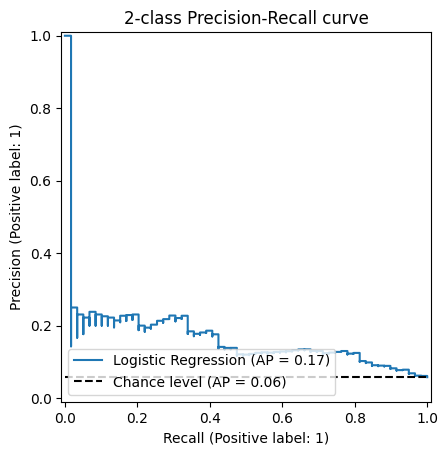

In [61]:
from sklearn.metrics import PrecisionRecallDisplay

display = PrecisionRecallDisplay.from_estimator(
    clf, X_test, y_test, name="Logistic Regression", plot_chance_level=True)
display.ax_.set_title("2-class Precision-Recall curve")

# Decision Tree

In [62]:
from sklearn import tree
model1=tree.DecisionTreeClassifier()
model1.fit(X_train, y_train)
tree_pred = model1.predict(X_test)
model1.score(X_test, y_test)

0.901174168297456




1. **Import the module**: `from sklearn import tree` imports the tree module from scikit-learn.
2. **Initialize the model**: `model1 = tree.DecisionTreeClassifier()` creates an instance of the Decision Tree classifier.
3. **Train the model**: `model1.fit(X_train, y_train)` fits the Decision Tree model to the training data.
4. **Make predictions**: `tree_pred = model1.predict(X_test)` generates predictions for the test data.
5. **Evaluate the model**: `model1.score(X_test, y_test)` calculates the accuracy of the model on the test data, returning the proportion of correctly predicted instances.





In [63]:
f1_score(y_test, tree_pred)

0.13675213675213677

In [64]:
precision_score(y_test, tree_pred)

0.13793103448275862



- **F1 Score**: The F1 score is the harmonic mean of precision and recall. It provides a single metric that balances both the precision (the accuracy of positive predictions) and recall (the ability to find all positive instances). The F1 score is particularly useful when you need to balance the trade-off between precision and recall, especially in cases of imbalanced datasets.

The function `f1_score(y_test, tree_pred)` takes two arguments:
- **`y_test`**: The actual labels of the test data.
- **`tree_pred`**: The predicted labels from the Decision Tree classifier.



In [65]:
recall_score(y_test,tree_pred)

0.13559322033898305



- **Precision**: Precision is the ratio of true positive predictions to the total number of positive predictions (both true positives and false positives). It measures how many of the instances predicted as positive by the model are actually positive. Precision is particularly important when the cost of false positives is high.

The function `precision_score(y_test, tree_pred)` takes two arguments:
- **`y_test`**: The actual labels of the test data.
- **`tree_pred`**: The predicted labels from the Decision Tree classifier.

